# Computational Mathematics
## An Introduction to Numerical Analysis and Scientific Computing with Python
### By Dimitrios Mitsotakis

# Chapter 6: Interpolation and Approximation 

## Lagrange Interpolation

**Definition:**  Given a discrete set of values $y_i$ at locations $x_i$, an *interpolant* is a continuous function $f(x)$ that passes  through the data (*i.e.* $f(x_i) = y_i$).

We will learn how to extract (unkown) information from experimental data using polinomial interpolation.

A polynomial is a function of the following form:
$$P_N(x)=a_0+a_1x+\cdots+a_{N-1}x^{N-1}+a_Nx^N$$


### Monomial basis

A naive way to compute the interpolating polynomial is based on monomial basis functions.

Let $P_N(x) = \sum^N_{i=0} a_i x^i$, $P_N(x)$ can be represented by a *linear combination* of the monomial basis functions $1, x, \ldots, x^N$ with coefficients $a_0, a_1, \ldots, a_N$, respectively.

#### Example: 

Consider $P_2(x) = a_0 + a_1 x + a_2 x^2$ with the four data points $(x_i, y_i), ~~ i = 0,1,2$. We want to find the coefficients $a_0,a_1,a_2$ such that $P_2(x_i)=y_i$ for $i=0,1,2$. 

We have four equations and four unknowns:

$$P_2(x_0) = a_0 + a_1 x_0 + a_2 x_0^2 = y_0$$

$$P_2(x_1) = a_0 + a_1 x_1 + a_2 x_1^2 = y_1$$

$$P_2(x_2) = a_0 + a_1 x_2 + a_2 x_2^2 = y_2$$

Lets rewrite these as a matrix equation:

$${\bf x} = \begin{pmatrix} x_0 \\ x_1 \\ x_2 \end{pmatrix} \quad {\bf y} = \begin{pmatrix} y_0 \\ y_1 \\ y_2  \end{pmatrix} \quad {\bf a} = \begin{pmatrix} a_0 \\ a_1 \\ a_2 \end{pmatrix}$$

Define the *Vandermonde* matrix as

$$
{\bf V} = \begin{pmatrix} 
     1 & x_0 & x_0^2  \\
     1 & x_1 & x_1^2  \\
     1 & x_2 & x_2^2  
\end{pmatrix}
$$

which allows us to write the system of linear equations as ${\bf V} {\bf a} = {\bf y}$:

$$\begin{pmatrix} 
     1 & x_0 & x_0^2  \\
     1 & x_1 & x_1^2  \\
     1 & x_2 & x_2^2 
\end{pmatrix} \begin{pmatrix} a_0 \\ a_1 \\ a_2 \end{pmatrix} = \begin{pmatrix} y_0 \\ y_1 \\ y_2 \end{pmatrix}$$


The general $n\times n$ Vandermonde matrix is defined as

$${\bf V} = \begin{pmatrix} 
    1      & x_0    & x_0^2  & \cdots & x_0^N  \\
    1      & x_1    & x_1^2  & \cdots & x_1^N  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_N    & x_N^2  & \cdots & x_N^N  \\
\end{pmatrix}
$$


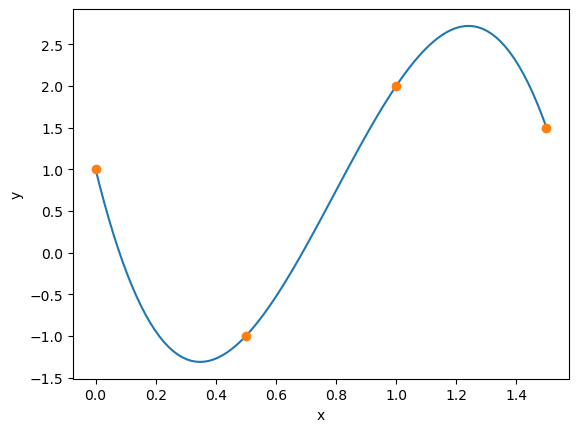

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

# interpolation data (x,y)
x = np.array([0.0, 0.5, 1.0, 1.5])
y = np.array([1.0, -1.0, 2.0, 1.5])
# assembly of Vandermonde matrix V
V = np.vander(x, increasing=True)
# solution of linear system Va=y
a = npl.solve(V,y)
# define more points for plotting
xx = np.linspace(0.0,1.5,100)
# evaluate the interpolating polynomial at xx 
p = a[0]+a[1]*xx+a[2]*xx**2+a[3]*xx**3 
plt.plot(xx,p)
plt.plot(x,y,'o')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

### Lagrange polynomials

To avoid computation with the Vandermonde matrix we will use a different basis for the set of polynomials, namely the Lagrangian basis functions.

Given $N+1$ points $(x_0,y_0), (x_1,y_1), \ldots, (x_{N},y_{N})$ again assuming the $x_i$ are all unique, the interpolating polynomial $P_N(x)$ can be written as

$$P_N(x) = \sum^{N}_{i=0} y_i \ell_i(x)$$

where 

$$\begin{aligned}
\ell_i(x) &= \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}\\
&= \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} 
\end{aligned}$$

Note that $\ell_i(x_i) = 1$ and $\forall j\neq i, ~~ \ell_i(x_j) = 0$.

It is easy to see that $P_N(x_i)=y_i$ since $\ell_i(x_j)=\delta_{ij}$, where 

$$\delta_{ij}=\left\{\begin{array}{ll}
0, & \mbox{ if } i\not=j\\
1, & \mbox{ if } i=j
\end{array}
\right.
$$

In [2]:
def lagrange_basis(z, x):
# Compute the Lagrange basis l_i(z)
# given the nodes x_i stored in vector x
    n = len(x)
    m = len(z)
    basis = np.ones((n, m))
    for i in range(n):
        for j in range(n):
            if i != j:
                basis[i,:] *= (z-x[j])/(x[i]-x[j])
    return basis

In [3]:
def lagrange_interpolant(z, x, y):
#Compute the interpolant using Lagrange polynomials
    n = len(x)
    m = len(z)
    P = np.zeros(m)
    basis = lagrange_basis(z, x)
    for i in range(n):
        P += basis[i,:] * y[i]
    return P

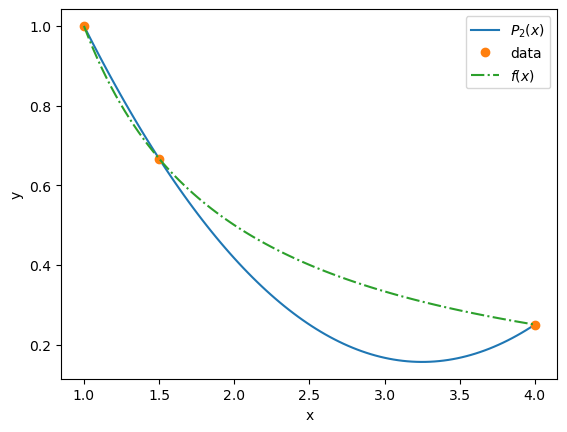

In [4]:
def f(x):
    return 1.0/x
# define points for creating plot
z = np.linspace(1, 4, 100)
# define data points and store them in x and y
x = np.array([1, 1.5, 4])
y = f(x)
# compute Lagrange interpolant and store it to yz
yz = lagrange_interpolant(z, x, y)
# plot the results
plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P_2(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

### Failure of Lagrange interpolation

Interpolate $f(x) = \frac{1}{1 + 25 x^2}$ using 6 points of your choosing on $x \in [-1, 1]$.

Try it with 11 points.

Keep increasing the number of points and see what happens.

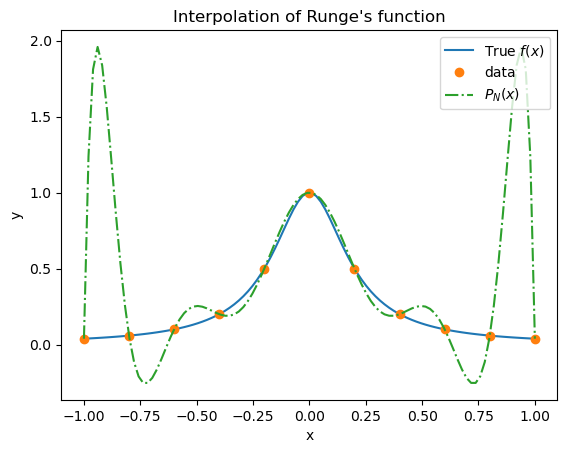

In [5]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)

z = np.linspace(-1, 1, 100)

N = 11

x = np.linspace(-1, 1, N)
y = f(x)

p = lagrange_interpolant(z, x, y)
    
# Plot the results
plt.plot(z, f(z), label="True $f(x)$")
plt.plot(x, y, 'o', label="data")
plt.plot(z, p, '-.', label="$P_N(x)$")


plt.title("Interpolation of Runge's function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right', ncol=1)

plt.show()

### Newton's method for computing the Langrange interpolant

We will introduce divided differences and using them we will develop a method for computing the interpolating polynomial.

If $P_N(x)$ is the Lagrange polynomial of degree $N$, interpolating $f(x)$ at the nodes $x_0,x_1,\cdots, x_N$ then this can be written as

$$
P_N(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\cdots+a_N(x-x_0)\cdots(x-x_{N-1})
$$

where $a_0,a_1,\cdots,a_N$ have to be computed.



For example 
$$
\begin{aligned}
P_3(x) &= a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+a_3(x-x_0)(x-x_1)(x-x_2)\\
&= a_0+(x-x_0)\{a_1+(x-x_1)[a_2+a_3(x-x_2)]\}
\end{aligned}
$$
which can be evaluated with the following recursive relations

$$
\begin{aligned}
& p_0(x)=a_3\\
& p_1(x)=a_2+(x-x_2)p_0(x)\\
& p_2(x)=a_1+(x-x_1)P_1(x)\\
& p_3(x)=a_0+(x-x_0)p_2(x)
\end{aligned}
$$
and finally $P_3(x)=p_3(x)$.

For arbitrary $N$ the recursive relation becomes:
$$
\begin{aligned}
p_0(x) &= a_N\\
p_k(x) &= a_{N-k}+(x-x_{N-k})p_{k-1}(x),\ k=1,2,\cdots,N
\end{aligned}
$$

And its implementation can be:

In [6]:
def poly_evaluation(a,x,z):
    #Evaluation of the polynomial with coefficients a at the points z
    N = len(x) - 1 #Degree of polynomial
    p = a[N]
    for k in range(1,N+1):
        p = a[N-k] + (z - x[N-k])*p
    return p

**Efficient evaluation of the coefficients:** Since the interpolation polynomial $P_N$ passes through the data $(x_k,y_k)$ we have 
$$y_k=P_N(x_k),\ k=0,1,\cdots,N$$

To compute the coefficients $a_i$ we define the **divided differences**

$$
\begin{aligned}
\Delta^1 y_i &= \frac{y_i-y_0}{x_i-x_0},\ i=1,2, \cdots, N\\
\Delta^2 y_i &= \frac{\Delta^1 y_i-\Delta^1 y_1}{x_i-x_1},\  i=2,3,\cdots, N\\
& \vdots\\
\Delta^N y_N &=  \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}}
\end{aligned}
$$


The coeficients $a_i$ are given as:

$$a_0=y_0,\quad a_1=\Delta^1 y_1, \quad a_2=\Delta^2 y_2, \quad \cdots \quad a_N=\Delta^N y_N$$

If the coefficients are computed by hand, it is convenient to work with the format of the following table:


| $x_0$ | $y_0$ |  $ \,$       |  $ \,$         |  $ \,$         |  $ \,$         |
|-------|-------|--------------|----------------|----------------|----------------|
| $x_1$ | $y_1$ | $\Delta^1 y_1$ |  $ \,$         |  $ \,$         |  $ \,$         |
| $x_2$ | $y_1$ | $\Delta^1 y_2$ | $\Delta^2 y_2$ |  $ \,$         |  $ \,$         |
| $x_3$ | $y_2$ | $\Delta^1 y_3$ | $\Delta^2 y_3$ | $\Delta^3 y_3$ |  $ \,$         |
| $x_4$ | $y_3$ | $\Delta^1 y_4$ | $\Delta^2 y_4$ | $\Delta^3 y_4$ | $\Delta^4 y_4$ |


the diagonal terms in the table are the coefficients of the interpolating polynomial.

This can be implemented as follows:


In [7]:
def poly_coeffs(x, y):
    n = len(x)
    a = y.copy()
    for k in range(1,n):
        a[k:n] = (a[k:n] - a[k-1])/(x[k:n] - x[k-1])
    return a

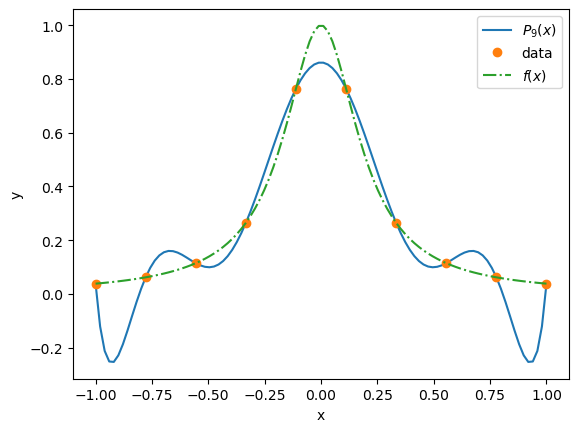

In [8]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)
# z are the points we use to plot the interpolating polynomial
z = np.linspace(-1, 1, 100)
x = np.linspace(-1, 1, 10)
y = f(x)
a = poly_coeffs(x, y)
# yz are the values of the interpolating polynomial at z
yz = poly_evaluation(a,x,z)
plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P_9(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

## Hermite Interpolation


Given $N+1$ nodes $x_0<x_1<\cdots<x_N$ and the values $f(x_i)$ and $f'(x_i)$ for $i=0,1,\dots, N$, the Hermite interpolating polynomial is the polynomial
$$H_{2N+1}(x)=\sum_{i=0}^N[\alpha_i(x)f(x_i)+\beta_i(x)f'(x_i)]\ ,$$
where $\alpha_i$ and $\beta_i$ are given in terms of the Lagrange polynomials as
$$\alpha_i(x)=[1-2\ell'_i(x_i)(x-x_i)]\ell^2_i(x) \quad \mbox{ and }\quad \beta_i(x)=(x-x_i)\ell^2_i(x)\ .$$

Here we present an implementation of the previous formulas. In order to compute the polynomials $\ell_i(x)$ we use the NumPy function `numpy.poly1d`, which given the polynomial coefficients in decreasing powers returns a polynomial function.  We then compute the first derivative of this function with the function `numpy.polyder`

In [9]:
def Hermite(x,y,z):
# x, y: are the interpolating data
# z: values of the derivative at points x
    N = len(x)
    p = np.poly1d([0]) # initialize p
    for i in range(N):
        #derive L_k
        L = np.poly1d([1])
        for j in range(N):
            if j!=i:
                L = L*np.poly1d([1.0/(x[i]-x[j]), - x[j]/(x[i]-x[j])])
        #Derivative of the Lagrange polynomials
        dL = np.polyder(L)
        #Computation of the functions alpha
        alpha = (np.poly1d([1])-2*dL(x[i])*np.poly1d([1,-x[i]]))*L**2
        #Computation of the functions beta
        beta = np.poly1d([1,-x[i]])*L**2
        p = p + alpha*y[i]+beta*z[i]
    return p

We test our code for the Runge's function. The Hermite interpolation doesn't solve the problem!

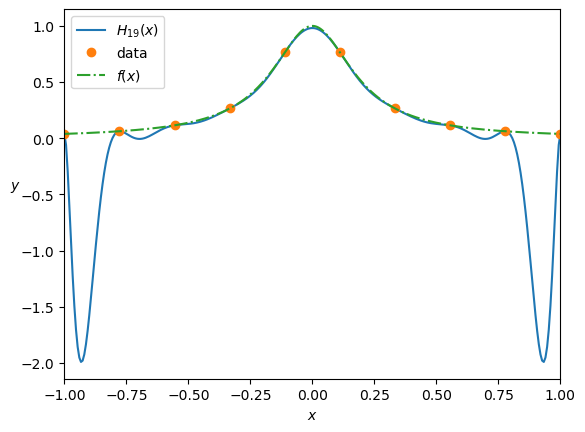

In [10]:
def f(x):
    return 1.0/(1+25*x**2)
def df(x):
    return -2*25*x/(1+25*x**2)**2
xi = np.linspace(-1,1,10)
yi = f(xi)
zi = df(xi)
x = np.linspace(-1,1,300)
y = f(x)
p = Hermite(xi,yi,zi)
y1 = p(x)
plt.plot(x, y1, label="$H_{19}(x)$")
plt.plot(xi, yi, 'o', label='data')
plt.plot(x, y, '-.',label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.xlim(-1, 1)
plt.legend(loc='upper left', ncol=1)
plt.show()

## Spline Interpolation

### Continuous Piecewise Linear Interpolation

To overcome the problems of Lagrange interpolation we use piecewise-polynomial interpolation.

With the piecewise linear interpolation we connect a set of data points
$$\{(x_0,f(x_0)),\ (x_1, f(x_1)), \cdots, (x_N,f(x_N))\}$$
using straight lines. 

We use `numpy.interp` to construct the linear interpolant

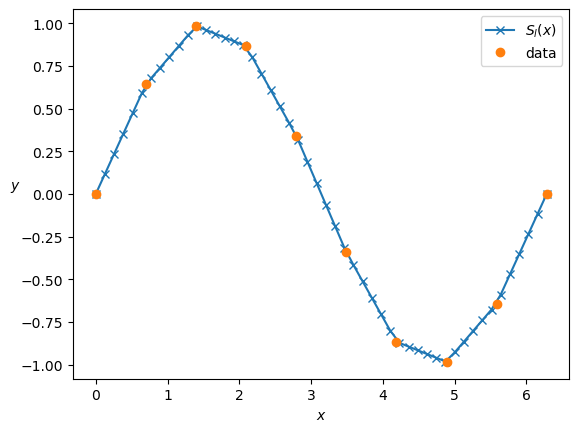

In [11]:
# define the interpolation points
xp = np.linspace(0, 2*np.pi, 10)
yp = np.sin(xp)
# define the points for ploting
x = np.linspace(0, 2*np.pi, 50)
# generate the linear spline
y = np.interp(x, xp, yp)
# plot spline vs data 
plt.plot(x, y, '-x', label='$S_l(x)$')
plt.plot(xp, yp, 'o', label='data')
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.legend(loc='upper right', ncol=1)

### Disadvantages of Piecewise-Linear Interpolations

- There is likely no differentiability at the endpoints of the subintervals. In a geometrical context, this implies that the interpolating function is not "smooth."
- Often, it is evident from physical conditions that smoothness is necessary, and therefore, the approximating function must be continuously differentiable.

### Cubic Splines

- The root of the word **spline** is the same as that of splint.
- It was originally a small strip of wood that could be used to join two boards.
- Subsequently, the term was employed to describe a lengthy and flexible strip, typically made of metal, which could be utilized to create uninterrupted, sleek curves by guiding the strip through predetermined points and tracing along the curve.

**Definition:** Given a function $f$ defined on $[a,b]$ and a set of nodes $ a = x_0 < x_1 < \cdots < x_n = b $, a **cubic cubic spline interpolant** $S$ for $f$ is a function that satisfies the following conditions:

- $S(x)$ is a cubic polynomial, denoted $S_j(x)$, on the subinterval $[x_j,x_{j+1}]$ for each $j=0,1,\ldots, n-1$;
- $S_j(x_j)=f(x_j)$ and $S_j(x_{j+1})=f(x_{j+1})$ for each $j=0,1,\ldots, n-1$;
- $S_{j+1}(x_{j+1})=S_j(x_{j+1})$ for each $j=0,1,\ldots, n-2$; (Implied by (b).)
- ${S'}_{j+1}(x_{j+1})={S'}_j(x_{j+1})$ for each $j=0,1,\ldots, n-2$;
- ${S''}_{j+1}(x_{j+1})={S''}_j(x_{j+1})$ for each $j=0,1,\ldots, n-2$;
- One of the following sets of boundary conditions is satisfied:
  * $S''(x_0)=S''(x_n)=0$  (natural (or free) boundary)
  * $S'(x_0)=f'(x_0)$ and $S'(x_n)=f'(x_n)$. (clamped boundary)

- Although cubic splines are defined with other boundary conditions, the previously mentioned conditions are sufficient for our purposes.
- When the free boundary conditions occur, the spline is called a natural spline
- Clamped boundary conditions lead to more accurate approximations because they include more information about the function.
- However, for this type of boundary condition to hold, it is necessary to have either the values of the derivative at the endpoints or an accurate approximation to those values.

### Algorithm for Clamped Cubic Splines

The algorithm for the computation of the moments (second derivatives) $z_0,z_1,\dots, z_N$ for cubic splines with clamped boundary conditions is summarized in the following Algorithm: 

- Given the points $y_0,y_1,\dots, y_N$ at the nodes $x_0,x_1,\dots, x_N$ and the boundary terms $f'(x_0)$ and $f'(x_N)$, compute the coefficients of the tridiagonal system 
- For $i=0:N-1$
     - $h_i=x_{i+1}-x_i$
     - $b_i=(y_{i+1}-y_i)/h_i$
- EndFor
- $u_0=1$, $c_0=2$, $v_0=6(b_0-f'(x_0))/h_0$
- For $k=1:N-1$
    - $c_i=2$
    - $u_i=h_i/(h_{i-1}+h_i)$
    - $l_i=h_{i-1}/(h_{i-1}+h_i)$
    - $v_i=6(b_i-b_{i-1})/(h_{i-1}+h_i)$
- EndFor
- $l_{N}=1$, $c_{N}=2$, $v_N=6(f'(x_N)-b_{n-1})/h_{N-1}$
- Form the triadiagonal matrix ${\bf A}=tridiag({\bf l},{\bf c},{\bf u})$
- Solve the linear system ${\bf A}{\bf z}={\bf v}$

This is implemented below

In [12]:
import numpy as np
import numpy.linalg as npl
import scipy.sparse as sps
    
def MyCubicSpline(x, y, dy0, dyN):
    # Returns the moments of f given the data x, y
    # dy0 is the derivative at the left boundary
    # dyN is the derivative at the right boundary
    n = len(x)
    c = np.zeros(n); v = np.zeros(n); u = np.zeros(n-1)
    l = np.zeros(n-1); b = np.zeros(n-1); h = np.zeros(n-1)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
        b[i] = (y[i+1]-y[i])/h[i] 
    u[0] = 1.0
    v[0] = 6.0*(b[0]-dy0)/h[0]
    c[0] = 2.0
    for i in range(1,n-1):
        c[i] = 2.0
        u[i] = h[i]/(h[i-1] + h[i])
        l[i-1] = h[i-1]/(h[i-1] + h[i])
        v[i] = 6.0*(b[i]-b[i-1])/(h[i-1] + h[i])
    l[n-2] = 1.0
    c[n-1] = 2.0
    v[n-1] = 6.0*(dyN-b[n-2])/h[n-2]
    diagonals = [c, l, u]
    A = sps.diags(diagonals, [0, -1, 1]).todense()
    z = npl.solve(A,v)
    return z

The evaluation of a clamped cubic spline with moments computed using the previous routine can be done using the following algorithm:


- Given the moments $z_1,\dots,z_N$ and a point $x$
- Find the value of $i$ for which $x\in[x_i,x_{i+1}]$ is true
- For $i=N-1:0:-1$
    - If $x\geq x_i$
        - Break
    - EndIf
- EndFor
- $h=x_{i+1}-x_i$
- $B = -hz_{i+1}/6-hz_i/3+(y_{i+1}-y_i)/h$
- $y=z_i/2+(x-x_i)(z_{i+1}-z_i)/6h$
- $y=B+(x-x_i)y$
- $y=y_i+(x-x_i)y$
- Variable $y$ contains the value of the spline evaluated at $x$


In [13]:
def EvalCubicSpline(x, y, z, xx):
    # Returns the cubic spline evaluated at xx
    # z = the moments of the cubic spline
    # xx = the vector with values of x on which we want the cubic spline
    n = len(x)
    m = len(xx)
    yy = np.zeros(m)
    for j in range(m):
        xvalue = xx[j]
        # First detect the index i
        for i in range(n-2, -1, -1):
            if (xvalue - x[i] >= 0.0):
                break
    # Implement formula (\ref{eq:clmbcbspl})
        h = x[i+1] - x[i]
        B = -h*z[i+1]/6.0-h*z[i]/3.0+(y[i+1]-y[i])/h
        tmp =z[i]/2.0+(xvalue-x[i])*(z[i+1]-z[i])/6.0/h        
        tmp = B+(xvalue-x[i])*tmp     
        yy[j] = y[i] + (xvalue - x[i])*tmp   
    return yy

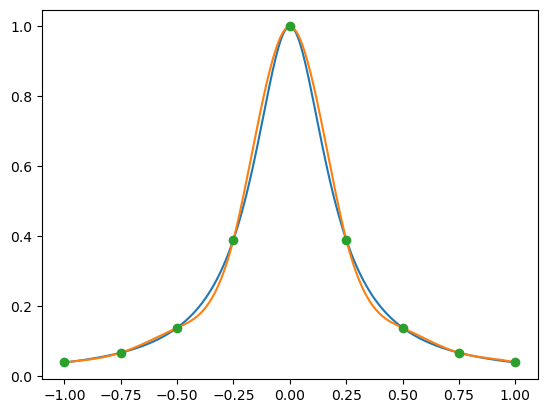

In [14]:
def f(x):
    return 1.0/(1+25*x**2)
def df(x):
    return -2*25*x/(1+25*x**2)**2
x = np.linspace(-1,1,9)
y = f(x)
z = df(x)
xx = np.linspace(-1,1,300)
yy = f(xx)
ss = MyCubicSpline(x, y, z[0], z[-1])
zz=EvalCubicSpline(x, y, ss, xx)
plt.plot(xx,yy,xx,zz,x,y,'o')

## Method of Least Squares

In this lesson we will learn how to compute a line that passes most nearly through a set of points

### Linear least squares

Given a set of data points

| $x$ | $x_0$ | $x_1$ | $x_2$ | $\cdots$ | $x_N$ |
|-----|-------|-------|-------|----------|-------|
| $y$ | $y_0$ | $y_1$ | $y_2$ | $\cdots$ | $y_N$ |

we will compute a strait line 

$$y=ax+b$$ 

that somehow is very close to these points. 


If the $k$th point $(x_k,y_k)$ is on the line, then

$$ax_k+b-y_k=0$$

but if doesn't, then the error will be

$$|ax_k+b-yk|$$

The total absolute error for all $N+1$ points will be

$$\sum_{k=0}^N |ax_k+b-y_k|$$

We then want to find the values of the coefficients $a$ and $b$ such that minimizes such an error. Because the absolute value of a function results to a non-smooth (non-differentiable) function we prefer to work with the square of the errors

$$ S(a,b) = \sum_{k=0}^N (ax_k+b-y_k)^2$$

where its extrimum is at the point where the partial derivative

$$\frac{\partial}{\partial a} S(a,b) = 0 \quad \mbox{ and } \frac{\partial}{\partial b} S(a,b) = 0$$

These equations lead to the following two equations

$$ \sum_{k=0}^N 2(ax_k+b-y_k)x_k=0$$

and 

$$ \sum_{k=0}^N 2(ax_k+b-y_k)=0$$

Rearanging these equations we get the so called **normal equations**:

$$
\begin{aligned}
\left(\sum_{k=0}^N x_k^2 \right) a + \left(\sum_{k=0}^N x_k \right)b & = \sum_{k=0}^N y_k x_k\\
\left(\sum_{k=0}^N x_k \right)a + \ \ \  (N+1)\ \ b & = \sum_{k=0}^N y_k
\end{aligned}
$$

where we used the fact that $\sum_{k=0}^N 1=N+1$

The last is a $2\times 2$ system of linear equations with unknowns the coefficients $a$ and $b$.

Denoting

$$p=\sum_{k=0}^N x_k, \quad q=\sum_{k=0}^N y_k, \quad r = \sum_{k=0}^N y_k x_k, \quad s = \sum_{k=0}^N x_k^2$$

it can be written in matrix-vector form as:

$$
\begin{bmatrix}
s & p\\
p & N+1
\end{bmatrix}
\begin{bmatrix}
a\\
b
\end{bmatrix}
=
\begin{bmatrix}
r\\
q
\end{bmatrix}
$$


Using Cramer's rule to solve it we need to compute first the determinant

$$
D=\det\begin{bmatrix}
s & p\\
p & N+1
\end{bmatrix} = (N+1)s-p^2
$$

and then the solution is:

$$
a = \frac{1}{D}\det\begin{bmatrix}
r & p\\
q & N+1
\end{bmatrix}=[(N+1)r-pq]/D
$$

and

$$
b = \frac{1}{D}\det \begin{bmatrix}
s & r\\
p & q
\end{bmatrix}=[sq-pr]/D
$$


Given the data points $(x_k,y_k)$ for $k=0,\dots, N$, we can express the previous process in a very simple algorithm:

**Algorithm**

Compute the following:

1. $p=\sum_{k=0}^N x_k$

2. $q=\sum_{k=0}^N y_k$

3. $r = \sum_{k=0}^N y_k x_k$

4. $s = \sum_{k=0}^N x_k^2$

5. $D = (N+1)s-p^2$

6. $a = [(N+1)r-p q]/D$

7. $b = [sq-pr]/D$

And here is an implementation:

In [15]:
def linear_least_squares(x, y, xx):
# returns the vector yy with the linear least squares 
# approximation of the input data (x,y)
    N = len(x)
    p = np.sum(x)
    q = np.sum(y)
    r = np.sum(np.multiply(x,y))
    s = np.sum(np.square(x))
    D = (N+1)*s-p**2
    a = [(N+1)*r - p*q]/D
    b = [s*q - p*r]/D
    yy = a*xx + b
    return yy 

In order to test our code we generate some random data aligned with the line $y=2x+1$. To generate a random vector with ten entries we use the NumPy function `random.rand`.


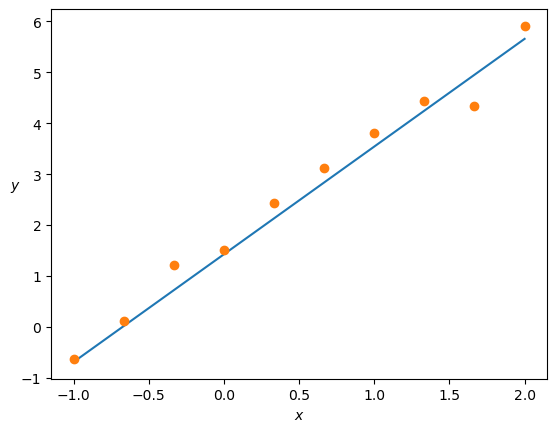

In [16]:
x = np.linspace(-1,2,10)
y = 2.0*x+1.0+np.random.rand(10)
xx = np.linspace(-1,2,20)
yy = linear_least_squares(x, y, xx)
plt.plot(xx,yy,'-',x,y,'o')
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.show()

### Polynomial fit

Eventually, the method of linear least squares can be generalized to polynomials of degree $m$
$$P_m(x)=\sum_{k=0}^m a_k x^k\ .$$


The resulting linear system is of order $m+1$. Specifically, the coefficients $a_j$, $j=0,1,\dots, m$ can be found by solving the linear system
$${\bf A}{\bf z}={\bf b}\ ,$$
where ${\bf z}=(a_0,a_1,\dots,a_m)^T$,
$$
{\bf A} = \begin{pmatrix}
N+1 & \sum x_i & \sum x_i^2 & \cdots & \sum x_i^m\\
\sum x_i & \sum x_i^2 & \sum x_i^3 & \cdots & \sum x_i^{m+1}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
\sum x_i^{m} & \sum x_i^{m+1} & \sum x_i^{m+2} & \cdots & \sum x_i^{2m}\\
\end{pmatrix}\quad
\text{ and }\quad 
{\bf b}=\begin{pmatrix}
\sum y_i\\
\sum x_iy_i\\
\vdots\\
\sum x_i^m y_i
\end{pmatrix}\ .
$$

The assembly and the solution of this linear system can be implemented as follows:

In [17]:
def poly_least_squares(x, y, xx, m):
# Computes the least squares approximation of degree m
# for the data points (x,y) evaluated at xx
    N = len(x)
    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    # Assembly of A and b
    for i in range(N):
        temp = y[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*x[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*x[i]
    for i in range(m+1):
        for j in range(m+1):
            A[i,j] = s[i+j]
    z = np.linalg.solve(A,b)
    # Evaluation of the polynomial at the nodes xx
    p = z[m]
    for j in range(m):
        p = p*xx+z[m-j-1]
    return p

We test our code by generating some random data aligned with the line $y=2x^2+1$. Check that the least squares approximation is a polynomial close to $y=2x^2+1$. 

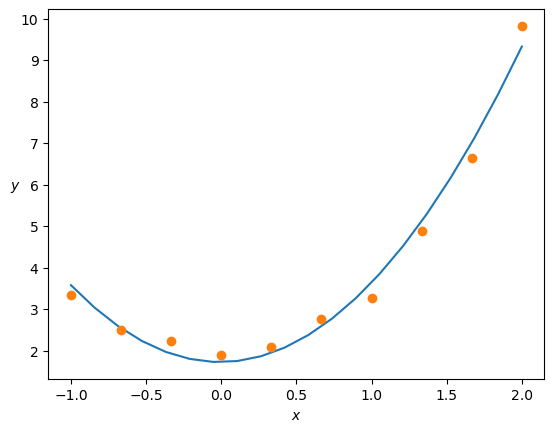

In [18]:
x = np.linspace(-1,2,10)
y = 2.0*np.square(x)+1.0+np.random.rand(10)
xx = np.linspace(-1,2,20)
yy = poly_least_squares(x, y, xx, 2)
plt.plot(xx,yy,'-',x,y,'o')
plt.xlabel('$x$'); plt.ylabel('$y$',rotation=0); plt.show()

### Non-Polynomial fit

Sometimes, the data follow a law that isn't necessarily close to a polynomial. For example their values might decay exponentially fast. This means that we would prefer to find a function of the form

$$f(x) = A e^{Bx}$$

instead. This problem can be easily transformed to a linear one by using the points $(x_i \ln y_i)$ instead $(x_i,y_i)$.

In order to see that, consider the function

$$F(x)=\ln f(x)=\ln A+Bx$$

So we will try to minimize the residuals:

$$R_i=\ln y_i-F(x_i)=\ln y_i-(\ln A+B x_i)$$

Setting $z_i=\ln y_i$ then the least squares problem now is to minimize the function

$$ S(a,b) = \sum_{k=0}^N (ax_k+b-z_k)^2$$

with $a=B$ and $b=\ln A$, which is obviously the same as before.

#### Example

Consider the data close to the function $y=3 e^{2x}$.

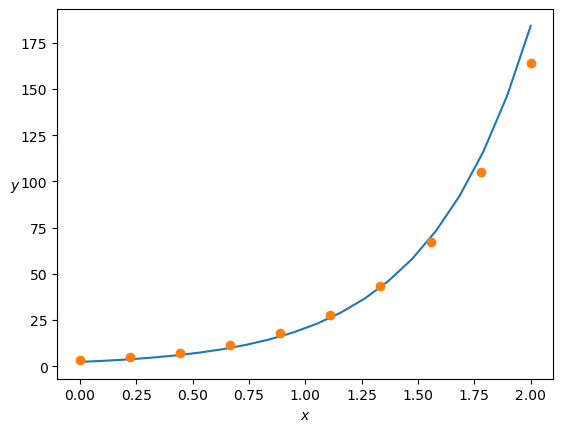

In [19]:
x = np.linspace(0,2,10)
y = 3.0*np.exp(2.0*x)+0.1*np.random.rand(10)
z = np.log(y)
xx = np.linspace(0,2,20)
zz = linear_least_squares(x, z, xx)
yy = np.exp(zz)
plt.plot(xx,yy,'-',x,y,'o')
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.show()

### Python implementation of least squares method

In Python the least squares method is implemented through the function `numpy.polyfit` which minimizes the function $S(a,b)$ and the function `poly1d` which returns the solution in the form of function capable to be evaluated at any point $x$.

Here is an example for the use of the functions `polyfit` and `poly1d`

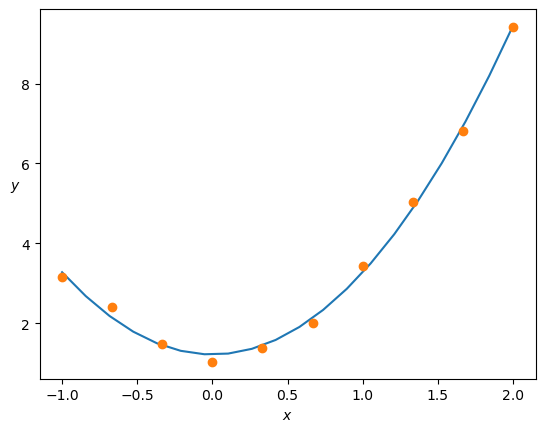

In [20]:
x = np.linspace(-1,2,10)
y = 2.0*np.square(x)+1.0+np.random.rand(10)
xx = np.linspace(-1,2,20)
yy = np.polyfit(x, y, 2)
zz = np.poly1d(yy)
plt.plot(xx,zz(xx),'-',x,y,'o')
plt.xlabel('$x$'); plt.ylabel('$y$',rotation=0); plt.show()

# The Module `scipy.interpolate`

SciPy provides the module `interpolate` with the implementation of several algorithms for interpolation problems. Here we present relevant routines for Lagrange and spline interpolation and their extensions in two dimensions, as well as an application in image processing.

The Lagrange interpolation is implemented in the function `scipy.interpolate.lagrange`. The `lagrange` function computes the Lagrange interpolation polynomial of the given data $(x_i,y_i)$, for $i=0,1,\dots, N$. The general call of this function is `lagrange(x,w)` where `x` is an array containing the values $x_i$ (the array `x` in our code) and `w` an array with the corresponding values $y_i$ (the array `y` in our code). The function `lagrange` returns the polynomial $P_N$ as a function which can be evaluated at any point $z$.



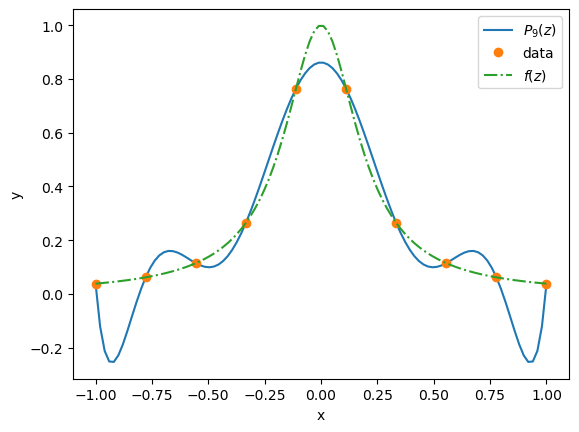

In [21]:
import scipy.interpolate as spi

def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)
# We evaluate the interpolant at the points z
z = np.linspace(-1, 1, 100)
# We use the data x,y
x = np.linspace(-1, 1, 10)
y = f(x)
# We compute the Lagrange polynomial p
p = spi.lagrange(x, y)
# We compare the graphs of the data and the interpolant
plt.plot(z,p(z),'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P_9(z)$","data","$f(z)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

In SciPy the cubic spline can be computed using the module `scipy.interpolate`

In [22]:
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import numpy as np

#### Runge's example again

We consider again the Runge's example:

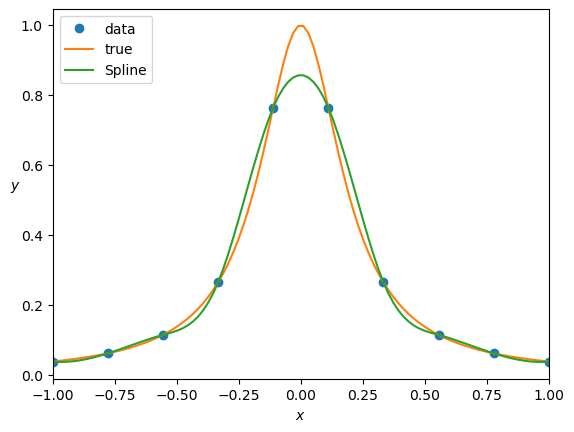

In [23]:
def f(x):
    return 1.0 / (1.0 + 25.0 * x**2)
num_points = 10
x = np.linspace(-1, 1, num_points)
y = f(x)
cs = spi.CubicSpline(x, y)
xx = np.linspace(-1, 1, 100)
plt.plot(x, y, 'o', label='data')
plt.plot(xx, f(xx), label='true')
plt.plot(xx, cs(xx), label='Spline')
plt.xlim(-1, 1)
plt.legend(loc='upper left', ncol=1)
plt.xlabel('$x$'); plt.ylabel('$y$',rotation=0); plt.show()

### Interpolation in two dimensions

We can perform interpolation of a two-dimensional set of points using the function `RegularGridInterpolator` of `scipy.interpolate`. The function `interp2d` will be deleted in future versions of SciPy.

Here we consider the function $e^{-(x^2+y^2)}$ and we will try to interpolate point on the surface of this function. First we plot it in a dense grid.

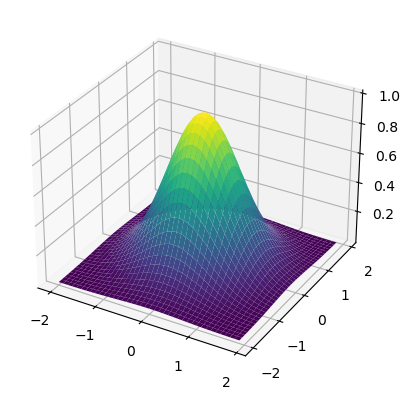

In [24]:
def f(x,y):
    z = np.exp(-(x**2+y**2))
    return z
# Specify that the graph is three-dimensional
fig = plt.figure()
ax = plt.axes(projection='3d')
# Generate the data
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

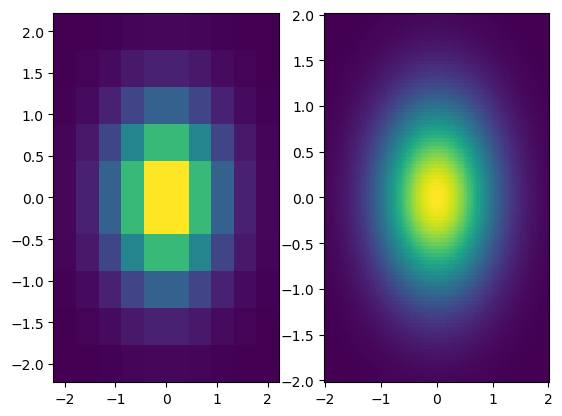

In [25]:
#define the function f
def f(x,y):
    z = np.exp(-(x**2+y**2))
    return z
# generate one-dimensional grids
x = np.linspace(-2, 2, 10)
y = x.copy()
z = f(x,y)
# generate two-dimensional grid arrays
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
# interpolate the coarse data
z2 = spi.RegularGridInterpolator((x, y), Z, method='cubic')
# evaluated the interpolant on dense grid
xx = np.linspace(-2, 2, 100)
yy = np.linspace(-2, 2, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = z2((XX,YY))
# plot the original and interpolated data
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].pcolormesh(X, Y, Z)
axes[1].pcolormesh(XX, YY, ZZ)
plt.show()

## Application in Image Processing

Here we apply the previous techinque to the photo 'Lenna.jpg'. We observe that by interpolation we can smooth rough edges of photographs

(128, 128, 3)


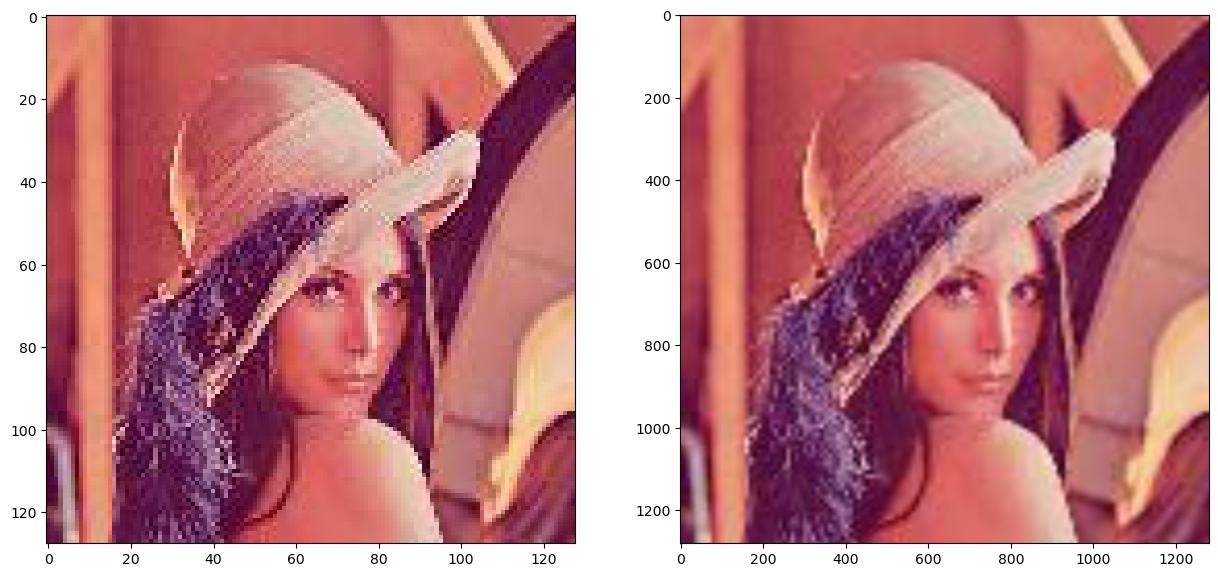

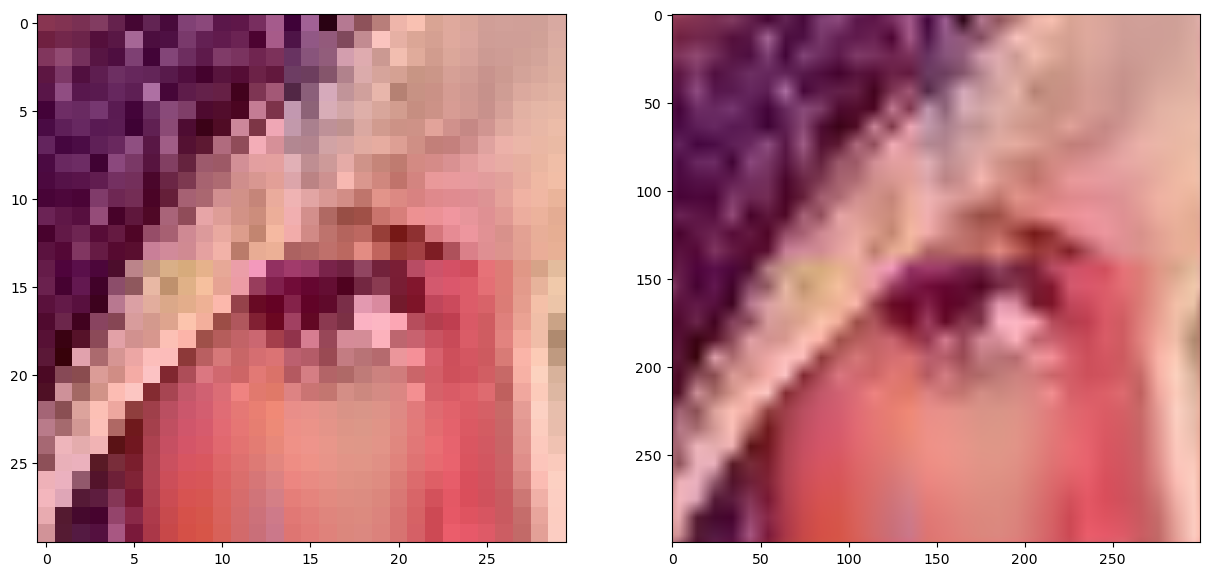

In [26]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy as np
import scipy.interpolate as spi

# read the picture from file lena.jpg
lenna = imageio.imread("Lenna.jpg");
print(lenna.shape)
# scale the values to be between 0.0 and 1.0
photo1 = np.clip(lenna.copy()/255.0,0.01,0.99)
# get the intensity of red, green, blue
red = photo1[:,:,0]
green = photo1[:,:,1]
blue = photo1[:,:,2]
n = len(red)
# generate x and y coordinates
x = np.linspace(0.0,128.0,n)
y = x.copy()
# interpolated the red, green and blue intensities
better_red = spi.RegularGridInterpolator((x,y),red,method='linear')
better_green = spi.RegularGridInterpolator((x,y),green,method='linear')
better_blue = spi.RegularGridInterpolator((x,y),blue,method='linear')
# generate dense xx and yy coordinates
xx = np.linspace(0.0,128.0,n*10)
yy = xx.copy()
row=len(xx)
col=len(yy)
XX, YY = np.meshgrid(xx, yy)
# create array photo2 for the high-resolution picture
photo2 = np.zeros((row, col, 3))
# interpolate the data
z1 = better_red((XX,YY))
photo2[:,:,0] = z1.transpose()
z2 = better_green((XX,YY))
photo2[:,:,1] = z2.transpose()
z3 = better_blue((XX,YY))
photo2[:,:,2] = z3.transpose()
f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(photo1)
axs[1].imshow(photo2)
# choose a square of your choice such as [50,80]x[50,80]
zoom1 = photo1[50:80,50:80,:]
zoom2 = photo2[500:800,500:800,:]
# compare the different data
f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(zoom1)
axs[1].imshow(zoom2)
plt.show()